**LOADING THE LIBRARIES**



In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

**LOADING THE DATAFRAME**

In [4]:
raw_data=pd.read_csv('insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**DATA ANALYSIS**

In [5]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Checking for the missing values
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
raw_data.duplicated(keep=False).sum()

2

**DATA VISUALIZATION**

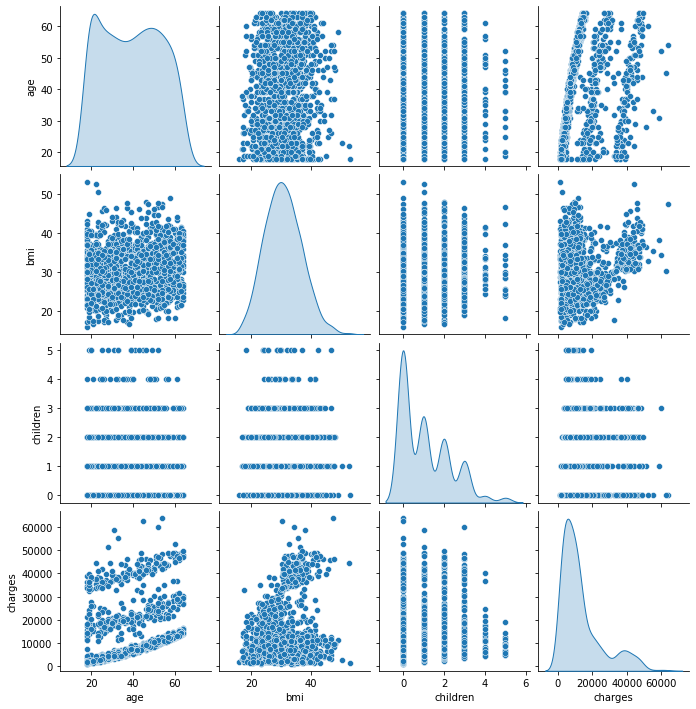

In [9]:
sns.pairplot(raw_data[['age', 'bmi', 'children', 'charges']], diag_kind='kde')

<AxesSubplot:>

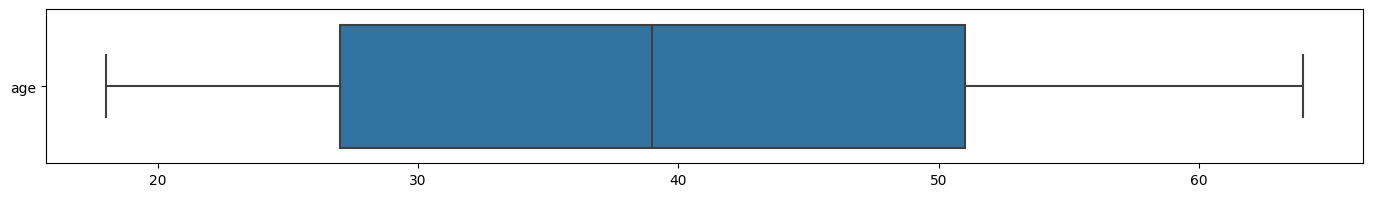

In [10]:
plt.figure(figsize=(17,2))
sns.boxplot(data=raw_data[["age"]], orient="h")

<AxesSubplot:>

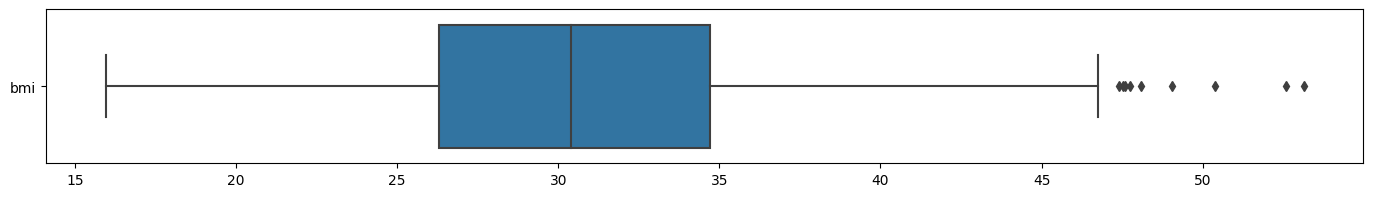

In [11]:
plt.figure(figsize=(17,2))
sns.boxplot(data=raw_data[["bmi"]], orient="h")

<AxesSubplot:>

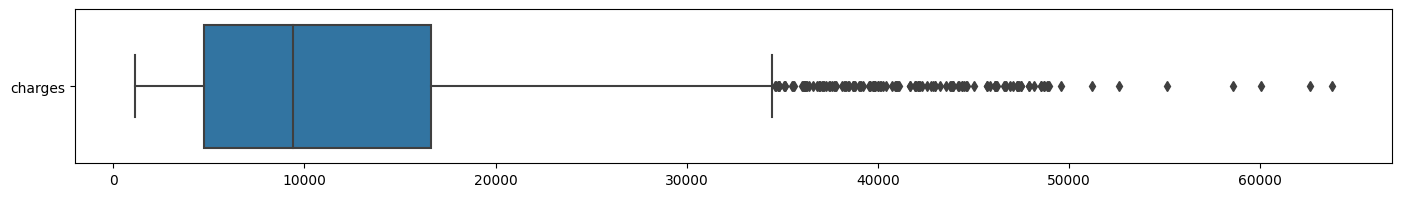

In [12]:
plt.figure(figsize=(17,2))
sns.boxplot(data=raw_data[["charges"]], orient="h")

C:\Users\Rao Sharjeel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

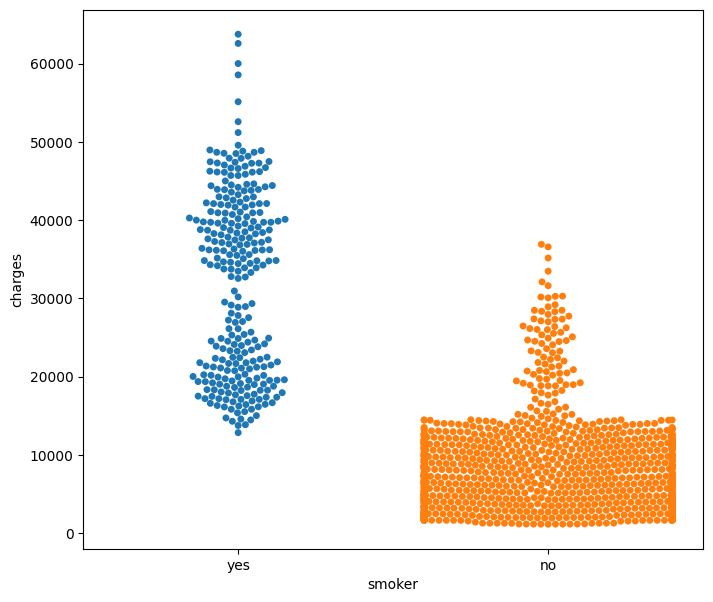

In [13]:
#From the output, we can say that on average, non-smokers are charged less than smokers, .
plt.figure(figsize=(8,7))
sns.swarmplot(x=raw_data['smoker'],y=raw_data['charges'])

<AxesSubplot:>

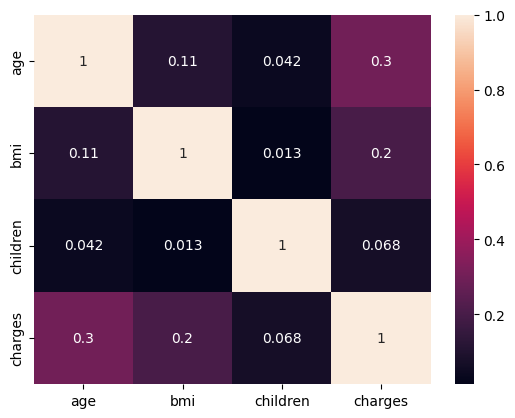

In [14]:
#lets use heatmap, to get more precise information on correlation
sns.heatmap(raw_data.corr(),annot=True)

DATA PREPROCESSING

In [15]:
df=raw_data.copy()

In [16]:
df_dum = pd.concat([df['sex'],df['smoker']], axis=1)
oe=OrdinalEncoder()
df_dum=oe.fit_transform(df_dum)
oe=pd.DataFrame(df_dum,columns=['sex','smoker'])
df = df.drop(['sex','smoker'], axis=1)
df = pd.concat([df, oe], axis=1)
df.head()

,age,bmi,children,region,charges,sex,smoker
0,19,27.900,0,southwest,16884.92400,0.0,1.0
1,18,33.770,1,southeast,1725.55230,1.0,0.0
2,28,33.000,3,southeast,4449.46200,1.0,0.0
3,33,22.705,0,northwest,21984.47061,1.0,0.0
4,32,28.880,0,northwest,3866.85520,1.0,0.0


In [17]:
OHE=pd.get_dummies(df['region'],sparse=False)
OHE.index = df.index
df = df.drop('region', axis=1)
df = pd.concat([df, OHE], axis=1)
df.head()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0.0,1.0,0,0,0,1
1,18,33.770,1,1725.55230,1.0,0.0,0,0,1,0
2,28,33.000,3,4449.46200,1.0,0.0,0,0,1,0
3,33,22.705,0,21984.47061,1.0,0.0,0,1,0,0
4,32,28.880,0,3866.85520,1.0,0.0,0,1,0,0


In [18]:
df.drop_duplicates(keep='first')

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0.0,1.0,0,0,0,1
1,18,33.770,1,1725.55230,1.0,0.0,0,0,1,0
2,28,33.000,3,4449.46200,1.0,0.0,0,0,1,0
3,33,22.705,0,21984.47061,1.0,0.0,0,1,0,0
4,32,28.880,0,3866.85520,1.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,0,1,0,0
1334,18,31.920,0,2205.98080,0.0,0.0,1,0,0,0
1335,18,36.850,0,1629.83350,0.0,0.0,0,0,1,0
1336,21,25.800,0,2007.94500,0.0,0.0,0,0,0,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = df

Scaler=MinMaxScaler()
scaled_df=Scaler.fit_transform(df.values)

#Scaler1=MinMaxScaler()
#scaled_y=Scaler1.fit_transform(y.values.reshape(-1,1))
#Scaler2=MinMaxScaler()
#scaled_df['charges']=Scaler2.fit_transform(scaled_df[['charges']])
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

scaled_df.head()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
X=scaled_df.drop('charges',axis=1)
y=scaled_df['charges']
X.head()

,age,bmi,children,sex,smoker,northeast,northwest,southeast,southwest
0,0.021739,0.321227,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train= X_train.values
X_test = X_test.values

## 3) Models Implementation

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [23]:
mod=GradientBoostingRegressor()
mod1=RandomForestRegressor()
mod2=LinearRegression()
mod3=LinearSVR()
mod4=Lasso()
mod5=ElasticNet()
mod6=KNeighborsRegressor()

m=mod.fit(X_train,y_train)
m1=mod1.fit(X_train,y_train)
m2=mod2.fit(X_train,y_train)
m3=mod3.fit(X_train,y_train)
m4=mod4.fit(X_train,y_train)
m5=mod5.fit(X_train,y_train)
m6=mod6.fit(X_train,y_train)

C:\Users\Rao Sharjeel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
from sklearn.metrics import mean_squared_error
y_pred =m.predict(X_test)
y_pred1=m1.predict(X_test)
y_pred2=m2.predict(X_test)
y_pred3=m3.predict(X_test)
y_pred4=m4.predict(X_test)
y_pred5=m5.predict(X_test)
y_pred6=m6.predict(X_test)

score =mean_squared_error(y_test,y_pred)
score1=mean_squared_error(y_test,y_pred1)
score2=mean_squared_error(y_test,y_pred2)
score3=mean_squared_error(y_test,y_pred3)
score4=mean_squared_error(y_test,y_pred4)
score5=mean_squared_error(y_test,y_pred5)
score6=mean_squared_error(y_test,y_pred6)

## 4) Models Evaluation

In [25]:
print("Gradient Boosting Regressor ",format(score))
print("Random Forest Regression:   ",format(score1))
print("Linear Regression:          ",format(score2))
print("Linear SVR:                 ",format(score3))
print("Lasso:                      ",format(score3))
print("ElasticNet:                 ",format(score3))
print("KNeighborsRegressor:        ",format(score3))

Gradient Boosting Regressor  0.004762767183362951
Random Forest Regression:    0.0056137854879250906
Linear Regression:           0.008598352781801422
Linear SVR:                  0.011099369150606952
Lasso:                       0.011099369150606952
ElasticNet:                  0.011099369150606952
KNeighborsRegressor:         0.011099369150606952


In [26]:
# Lets Use Deep Learning model to decrease the Mean Square Error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [25]:
X_train.shape[1]

9

In [26]:
model_dp = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(9,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
    ])


model_dp.compile(
    optimizer='adam',
    loss='mean_absolute_error'
)


Minimum Validation Loss: 0.0259
Minimum Validation Loss: 0.0259


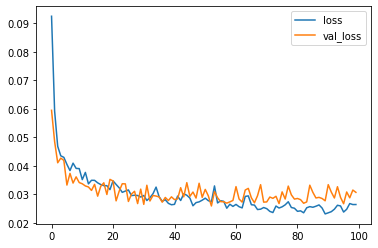

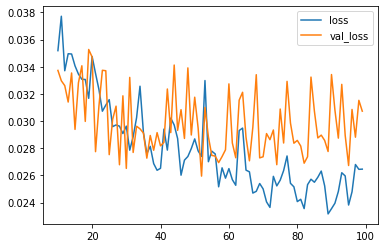

In [27]:
history  = model_dp.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [28]:
test_results= model_dp.evaluate(X_test, y_test, verbose=0)
test_results

0.030048996210098267

In [29]:
y_p=model_dp.predict(X_test)
mean_squared_error(y_test,y_p)

0.0061492383663088405

## 5) Saving The Best Model

In [27]:
#Saving the model using pickle
import pickle
file=open('model.pkl','wb')
pickle.dump(m,file)
file.close()

In [47]:
age=int(input('age'))

Amin=df.age.min()
Amax=df.age.max()
age=(age-Amin)/(Amax-Amin)
print(age)

bmi=float(input('bmi'))
Bmin=df.bmi.min()
Bmax=df.bmi.max()
bmi=(bmi-Bmin)/(Bmax-Bmin)
print(bmi)
chld=int(input('chld'))
Gender=int(input('gender'))
smoke=int(input('smk'))
Area=int(input('Area'))



Cmin=df.children.min()
Cmax=df.children.max()
chld=(chld-Cmin)/(Cmax-Cmin)

a=[0,0,0,0]
a[Area]=1
final=[age,bmi,chld,Gender,smoke,*a]
final=np.array(final)
r=m.predict([final])[0]
#final_test=[age,Gender,bmi,r,chld,smoke,*a]
#f=Scaler.inverse_transform([final_test])
Xmin=df.charges.min()
Xmax=df.charges.max()
Xr=r*(Xmax-Xmin)+Xmin 
Xr
#print(final)


age32
0.30434782608695654
bmi28
0.32391713747645945
chld0
gender1
smk0
Area1


4251.947246123942